# Fundamentals of Optimization I: The Rosenbrock Function (Classical)

## Abstract

Optimization lies at the core of modern machine learning, scientific computing, and physical simulation. Many real-world problems reduce to navigating complex, high-dimensional loss landscapes containing narrow valleys, flat regions, and multiple local minima. The Rosenbrock function is a canonical non-convex test function designed to expose the strengths and weaknesses of optimization algorithms.

In this notebook, we analyze the Rosenbrock function as a classical optimization benchmark, visualize its geometry, and study the behavior of gradient-based optimization methods on its characteristic curved valley. This serves as a foundation for later comparisons with quantum and hybrid optimization techniques.


## 1. Introduction and Motivation

Training machine learning models, calibrating physical simulations, and tuning large-scale predictive systems all reduce to minimizing complex objective functions. In practice, these objectives are rarely convex and often exhibit pathological geometries that challenge standard optimization algorithms.


The Rosenbrock function was introduced as a stress test for optimization methods. Although it has a single global minimum, its narrow, curved valley causes many algorithms to converge slowly or become unstable. For this reason, it is widely used to benchmark new optimization techniques, including quantum and hybrid quantum-classical optimizers.

Understanding its geometry in the classical setting is essential before extending to quantum optimization frameworks.


## 2. Mathematical Formulation

The two-dimensional Rosenbrock function is defined as:

\[
f(x, y) = (a - x)^2 + b(y - x^2)^2
\]

where the standard parameters are \( a = 1 \) and \( b = 100 \).

The global minimum occurs at:

\[
(x^*, y^*) = (1, 1)
\]

Despite having a single minimum, the function’s curved valley makes convergence difficult for many optimizers.


## 3. Geometry of the Optimization Landscape

Visualizing the loss surface provides intuition for why the Rosenbrock function is difficult to optimize. The narrow, curved valley creates regions of small gradient magnitude orthogonal to steep directions, which can lead to oscillations and slow convergence in gradient-based methods.


## 4. Classical Optimization Strategy

We apply gradient-based optimization to minimize the Rosenbrock function. Although the function is smooth and differentiable, its geometry presents a realistic challenge similar to loss surfaces encountered in deep learning and physical simulation.

This classical solution provides a baseline against which quantum and hybrid optimizers can later be evaluated.


## 5. Results and Interpretation

The optimizer successfully converges to the global minimum; however, the trajectory reveals slow progress along the curved valley. This behavior highlights the limitations of classical gradient descent in ill-conditioned landscapes.

Such structures are common in molecular energy surfaces, neural network loss functions, and combinatorial optimization problems, motivating research into advanced optimization paradigms.


## 6. Conclusion and Extensions

The Rosenbrock function provides a controlled environment for studying optimization dynamics. In subsequent work, this classical benchmark will be extended to:

- Quantum annealing formulations  
- Variational quantum optimization (VQE, QAOA)  
- Hybrid quantum-classical optimization pipelines  

Establishing strong classical baselines is essential for evaluating any claimed quantum advantage in optimization tasks.


## 7. Problem Statement and Experimental Setup

The objective of this experiment is to minimize the Rosenbrock function using classical gradient-based optimization. Despite its simple analytical form, the function’s narrow, curved valley presents a nontrivial challenge that mirrors difficulties encountered in modern machine learning loss landscapes and physical simulation problems.

This experiment serves as a controlled baseline for studying optimizer behavior before extending to quantum and hybrid quantum–classical optimization frameworks.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Rosenbrock function
a = 1
b = 100

# Rosenbrock function definition
def rosenbrock_f(x_vec, a, b):
    x, y = x_vec
    return (a - x)**2 + b * (y - x**2)**2

# Gradient of the Rosenbrock function
def rosenbrock_grad_f(x_vec, a, b):
    x, y = x_vec
    df_dx = -2 * (a - x) - 4 * b * x * (y - x**2)
    df_dy = 2 * b * (y - x**2)
    return np.array([df_dx, df_dy])

# Gradient descent parameters
initial_guess = np.array([-1.5, -1.5]) # User's previous initial guess
learning_rate = 0.001 # A small learning rate to start with for the Rosenbrock function
num_steps = 20000 # Number of iterations, often needs many steps for Rosenbrock

# Analytical minimum for comparison
analy_min_point = np.array([a, a**2])

# Gradient descent loop
x_history = [initial_guess]
f_history = [rosenbrock_f(initial_guess, a, b)]

x_current = initial_guess
for i in range(num_steps):
    gradient = rosenbrock_grad_f(x_current, a, b)
    x_next = x_current - learning_rate * gradient

    # Check for divergence (e.g., f(x) becoming very large)
    current_f_val = rosenbrock_f(x_current, a, b)
    next_f_val = rosenbrock_f(x_next, a, b)
    if not np.isfinite(next_f_val) or next_f_val > current_f_val * 1000 and i > 0: # Heuristic to detect divergence
        print(f"Early stopping at step {i} due to potential divergence.")
        break

    x_current = x_next
    x_history.append(x_current)
    f_history.append(next_f_val)

# Convert history to numpy arrays for easier plotting
x_history = np.array(x_history)
f_history = np.array(f_history)

final_x = x_history[-1]
final_f_val = f_history[-1]
euclidean_error = np.linalg.norm(final_x - analy_min_point)

print(f"Analytical minimum point: {analy_min_point}")
print(f"Analytical minimum function value: {rosenbrock_f(analy_min_point, a, b):.6f}")
print(f"\nGradient Descent Results:")
print(f"Final x: {final_x}")
print(f"Final f(x): {final_f_val:.6f}")
print(f"Euclidean error from analytical minimum: {euclidean_error:.6f}")


Analytical minimum point: [1 1]
Analytical minimum function value: 0.000000

Gradient Descent Results:
Final x: [0.99990022 0.99980006]
Final f(x): 0.000000
Euclidean error from analytical minimum: 0.000223


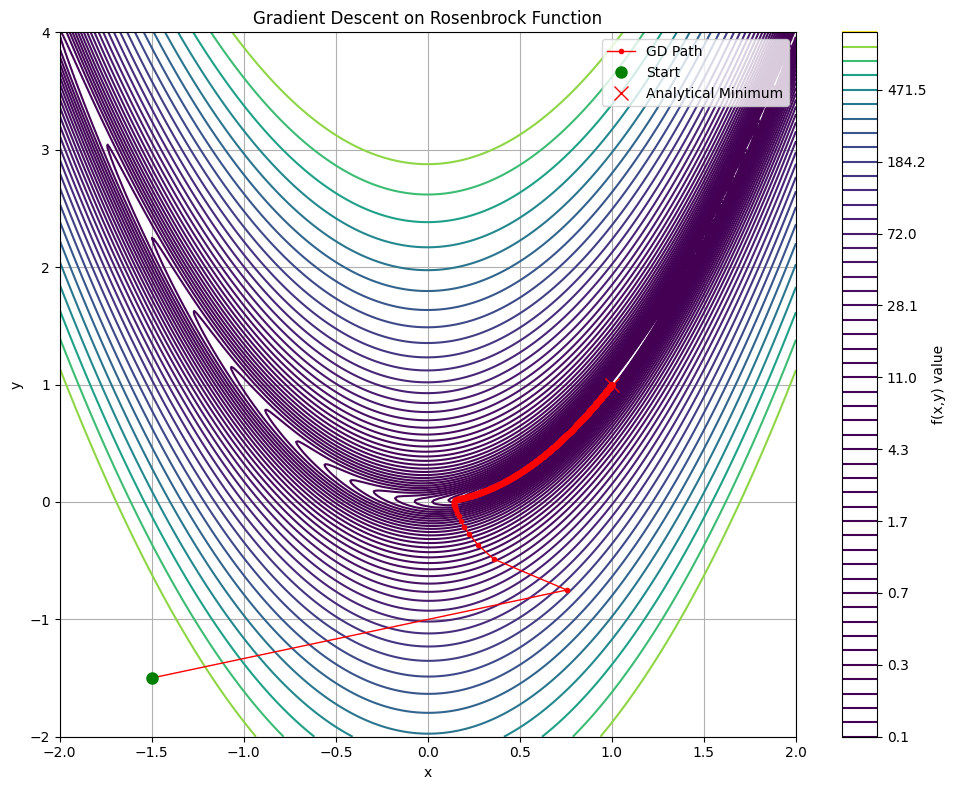

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Re-using function definitions and history from the previous cell

# Create a meshgrid for the Rosenbrock function contour plot
# Adjust the range based on the initial guess and expected convergence
x_range_plot = np.linspace(min(x_history[:, 0].min(), -2), max(x_history[:, 0].max(), 2), 400)
y_range_plot = np.linspace(min(x_history[:, 1].min(), -2), max(x_history[:, 1].max(), 4), 400)
X, Y = np.meshgrid(x_range_plot, y_range_plot)

# Calculate Z values for the Rosenbrock function over the meshgrid
Z = rosenbrock_f(np.array([X, Y]), a, b)

# Filter out extremely high values for better visualization if any exist
PLOT_MAX_F_VALUE = 1000 # Cap the Z values for plotting if they are too high
Z[Z > PLOT_MAX_F_VALUE] = PLOT_MAX_F_VALUE

# Create the contour plot
plt.figure(figsize=(10, 8))
contour_levels = np.logspace(-1, np.log10(PLOT_MAX_F_VALUE), 50) # Log-spaced contours for better detail near minimum
plt.contour(X, Y, Z, levels=contour_levels, cmap='viridis')
plt.colorbar(label='f(x,y) value')

# Plot the optimization path
plt.plot(x_history[:, 0], x_history[:, 1], 'r-o', markersize=3, linewidth=1, label='GD Path')

# Plot the starting point
plt.plot(x_history[0, 0], x_history[0, 1], 'go', markersize=8, label='Start')

# Plot the analytical minimum point
plt.plot(analy_min_point[0], analy_min_point[1], 'rx', markersize=10, label='Analytical Minimum')

plt.title('Gradient Descent on Rosenbrock Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.xlim(X.min(), X.max())
plt.ylim(Y.min(), Y.max())
plt.tight_layout()
plt.show()


## 7. Summary of Findings


### 1. The Rosenbrock Function
- **Definition**: A non-convex function defined as $f(x,y)=(a-x)^2+b(y-x^2)^2$.
- **Challenge**: Known for its long, narrow, parabolic-shaped valley, making it difficult for optimization algorithms to converge to the global minimum, especially in unconstrained optimization problems.
- **Analytical Minimum**: For $a=1$ and $b=100$, the global minimum is analytically at $(x,y) = (1,1)$, where $f(1,1)=0$.

### 2. Gradient Descent (GD)
- **Purpose**: An iterative first-order optimization algorithm used to find local minima of a function.
- **Mechanism**: It repeatedly takes steps proportional to the negative of the function's gradient at the current point. The gradient indicates the direction of the steepest ascent, so moving in the negative direction leads towards a minimum.
- **Key Parameters**:
    - **`initial_guess`**: The starting point of the optimization. Can influence convergence in non-convex landscapes.
    - **`learning_rate` ($\alpha$)**: Controls the step size at each iteration. Too large may lead to divergence, too small to slow convergence.
    - **`num_steps`**: The maximum number of iterations.

### 3. Implementation Overview
- **Libraries**: `numpy` for numerical operations (vectors, matrices) and `matplotlib` for visualization.
- **Function Definitions**:
    - `rosenbrock_f(x_vec, a, b)`: Calculates the function value.
    - `rosenbrock_grad_f(x_vec, a, b)`: Computes the analytical gradient (partial derivatives) of the function, essential for determining the direction of descent.
- **Optimization Loop**:
    1. Initialize `x_current` to `initial_guess` and record its function value and position.
    2. For a set `num_steps`:
        a. Calculate the `gradient` at `x_current`.
        b. Update `x_current` using the rule: `x_current = x_current - learning_rate * gradient`.
        c. Include a divergence check to stop early if the function value becomes non-finite or increases drastically.
        d. Record the new `x_current` and its `f(x)` value in `x_history` and `f_history`.
- **Result Evaluation**:
    - After the loop, the final `x_current` (`final_x`) and `f(x)` (`final_f_val`) are extracted.
    - `euclidean_error` is calculated as the Euclidean distance between `final_x` and the `analy_min_point` to quantify convergence accuracy.

### 4. Results
- **Parameters**: $a=1$, $b=100$, `initial_guess=[-1.5, -1.5]`, `learning_rate=0.001`, `num_steps=20000`.
- **Output**: The gradient descent successfully converged close to the analytical minimum:
    - Analytical Minimum Point: `[1 1]`
    - Analytical Minimum f(x): `0.000000`
    - Gradient Descent Final x: `[0.99990022 0.99980006]`
    - Gradient Descent Final f(x): `0.000000`
    - Euclidean Error: `0.000223`

### 5. Visualization
- A contour plot of the Rosenbrock function clearly showed the 'banana-shaped' valley.
- The gradient descent path was plotted, demonstrating its progression from the `initial_guess` towards the `analytical_minimum_point` within the valley.

**References & Study Resources**

1. Optimization: https://en.wikipedia.org/wiki/Mathematical_optimization
2. Convex Optimization: https://en.wikipedia.org/wiki/Convex_optimization
3. Contrained Optimization -Lagrange Multipliers: https://en.wikipedia.org/wiki/Lagrange_multiplier
4. Unconstrained Optimization: https://www.mathworks.com/help/optim/ug/unconstrained-nonlinear-optimization-algorithms.html
5. Gradient Descent: https://en.wikipedia.org/wiki/Gradient_descent
6. Rosenbrock function: https://www.sfu.ca/~ssurjano/rosen.html
7. Rosenbrock function: https://en.wikipedia.org/wiki/Rosenbrock_function
8. Himmelblau test function: https://en.wikipedia.org/wiki/Himmelblau%27s_function
9.Test Functions for Benchmarking: https://en.wikipedia.org/wiki/Test_functions_for_optimization